CHƯƠNG 7: KHÔNG GIAN VECTOR VÀ ÁNH XẠ TUYẾN TÍNH (PHẦN 1)

1. Giới thiệu một số ứng dụng của tích vector (dot product)

In [36]:
import numpy as np
signals=np.array([[1,2],[3,4],[10,0]])
sample=np.array([3,-1])
np.inner(signals,sample)

array([ 1,  5, 30])

1.1. Ứng dụng 1 – Nguyên lý tìm nốt nhạc trong chuỗi âm thanh (Audio search)

In [37]:
import numpy as np
A=np.array([0,0,-1,2,3,-1,0,1,-1,-1])
search_vector=np.array([0,1,-1])
print("Kích thước:", len(A), len(search_vector))

Kích thước: 10 3


In [38]:
B=np.array([1])
B=np.resize(B,(len(A)-len(search_vector)+1,len(search_vector)))
B=np.asmatrix(B)
for i in range(len(A)-len(search_vector)+1):
  for j in range(len(search_vector)):
    B[i,j] = A[i+j]
print("Ma trận B:")
print(B)

Ma trận B:
[[ 0  0 -1]
 [ 0 -1  2]
 [-1  2  3]
 [ 2  3 -1]
 [ 3 -1  0]
 [-1  0  1]
 [ 0  1 -1]
 [ 1 -1 -1]]


In [39]:
C=np.inner(B,search_vector)
print("Tích vô hướng:")
print(C)
target=np.inner(search_vector,search_vector)
print("Giá trị mục tiêu cần khớp:",target)
print("Vị trí khớp:")
for i in range(len(A)-len(search_vector)+1):
    if C[0,i]==target:
        print(i, B[i])

Tích vô hướng:
[[ 1 -3 -1  4 -1 -1  2  0]]
Giá trị mục tiêu cần khớp: 2
Vị trí khớp:
6 [[ 0  1 -1]]


1.2. Ứng dụng 2 – Tạo ảnh mẫu và làm mờ ảnh

- [Downsampling] Kỹ thuật tạo ảnh mẫu:

Saving anhtraidat.jpg to anhtraidat (3).jpg


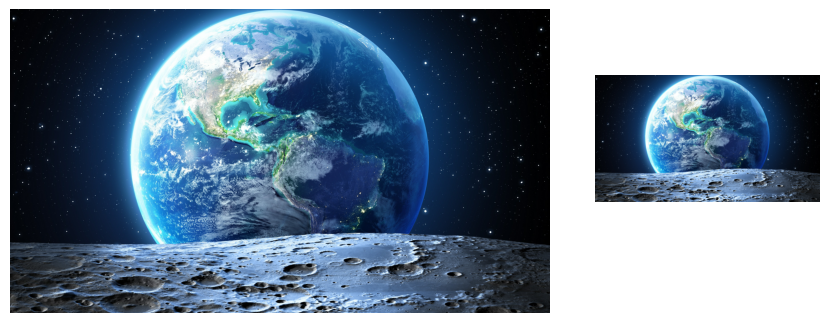

In [40]:
from google.colab import files
uploaded=files.upload()
from PIL import Image
import matplotlib.pyplot as plt
img=Image.open('anhtraidat.jpg').convert("RGB")
new_img=img.resize((int(img.width*0.6), int(img.height*0.6)),Image.Resampling.LANCZOS)
fig=plt.figure(figsize=(9,4.5))
ax1=fig.add_axes([0.05,0.1,0.6,0.8])
ax1.imshow(img)
ax1.axis('off')
ax2=fig.add_axes([0.7,0.3,0.25,0.5])
ax2.imshow(new_img)
ax2.axis('off')
plt.show()

- [Image blur] Kỹ thuật làm mờ ảnh:

Saving anhlammo.png to anhlammo (4).png


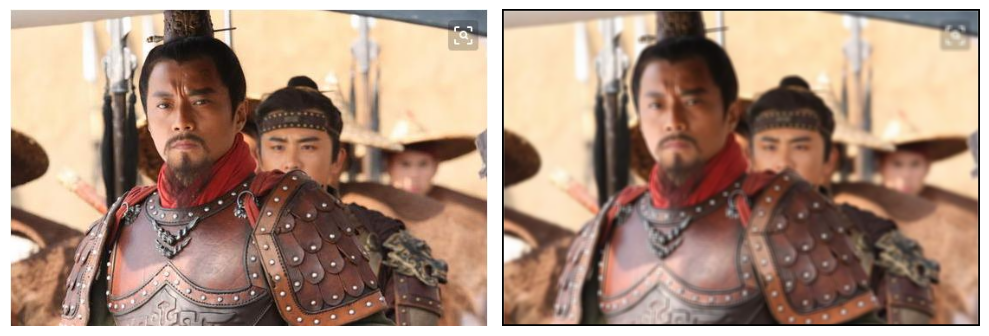

In [41]:
from PIL import Image, ImageDraw
import matplotlib.pyplot as plt
from google.colab import files
uploaded=files.upload()
input_image=Image.open('anhlammo.png').convert("RGB")
input_pixels=input_image.load()
kernel=[[1/25]*5 for _ in range(5)]
offset=len(kernel)//2
output_image=Image.new("RGB",input_image.size)
draw=ImageDraw.Draw(output_image)
for x in range(offset,input_image.width-offset):
    for y in range(offset,input_image.height-offset):
        acc=[0,0,0]
        for a in range(len(kernel)):
            for b in range(len(kernel[0])):
                xn=x+a-offset
                yn=y+b-offset
                pixel=input_pixels[xn,yn]
                acc[0]+=pixel[0]*kernel[a][b]
                acc[1]+=pixel[1]*kernel[a][b]
                acc[2]+=pixel[2]*kernel[a][b]
        draw.point((x,y),(int(acc[0]),int(acc[1]),int(acc[2])))
plt.figure(figsize=(10, 4))
plt.subplot(1,2,1)
plt.imshow(input_image)
plt.axis('off')
plt.subplot(1,2,2)
plt.imshow(output_image)
plt.axis('off')
plt.tight_layout()
plt.show()

Saving anhbaitap3.jpg to anhbaitap3 (6).jpg
Gốc: (720, 405)
Scale: (160, 160)
Resize: (160, 160)
Downscale: (140, 79)


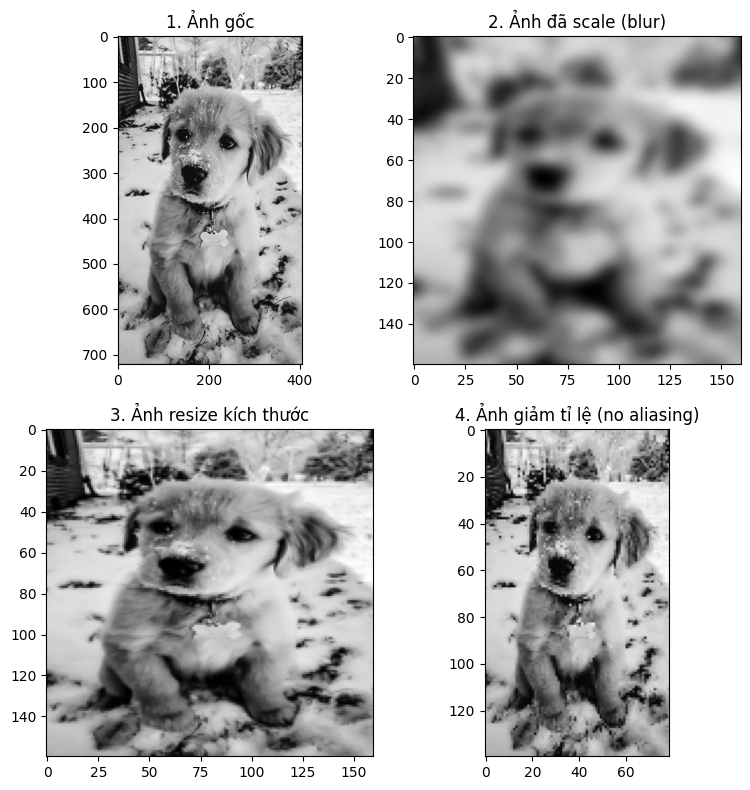

In [42]:
from google.colab import files
uploaded=files.upload()
import matplotlib.pyplot as plt
from skimage.io import imread
from skimage.color import rgb2gray
from skimage.transform import resize,rescale
from skimage.filters import gaussian
image=imread('anhbaitap3.jpg')
gray=rgb2gray(image)
image_scaled=resize(gray,(160,160),anti_aliasing=True)
image_scaled=gaussian(image_scaled,sigma=3)
image_resized=resize(gray,(160,160),anti_aliasing=True)
orig_h, orig_w=gray.shape
target_h=140
scale_factor=target_h/orig_h
image_downscaled=rescale(gray, scale=(scale_factor, scale_factor), anti_aliasing=False)
print("Gốc:",gray.shape)
print("Scale:",image_scaled.shape)
print("Resize:",image_resized.shape)
print("Downscale:",image_downscaled.shape)
fig,axes=plt.subplots(2,2,figsize=(8,8))
ax=axes.ravel()
ax[0].imshow(gray, cmap='gray')
ax[0].set_title("1. Ảnh gốc")
ax[1].imshow(image_scaled,cmap='gray')
ax[1].set_title("2. Ảnh đã scale (blur)")
ax[2].imshow(image_resized,cmap='gray')
ax[2].set_title("3. Ảnh resize kích thước")
ax[3].imshow(image_downscaled,cmap='gray')
ax[3].set_title("4. Ảnh giảm tỉ lệ (no aliasing)")
for a in ax:
    a.axis('on')
plt.tight_layout()
plt.show()

2. Ứng dụng: Xếp hạng các trang web với trị riêng và vector riêng

2.1.Đơn giản hóa thuật toán Pagerank

Kết quả bảng PageRank sau 10 lần lặp:
              x_A       x_B       x_C       x_D
Lần lặp                                        
0        1.000000  1.000000  1.000000  1.000000
1        0.666667  0.333333  0.833333  0.833333
2        0.555556  0.277778  0.611111  0.611111
3        0.407407  0.203704  0.481481  0.481481
4        0.320988  0.160494  0.364198  0.364198
5        0.242798  0.121399  0.281893  0.281893
6        0.187929  0.093964  0.215364  0.215364
7        0.143576  0.071788  0.165752  0.165752
8        0.110501  0.055251  0.127039  0.127039
9        0.084692  0.042346  0.097597  0.097597
10       0.065065  0.032532  0.074878  0.074878


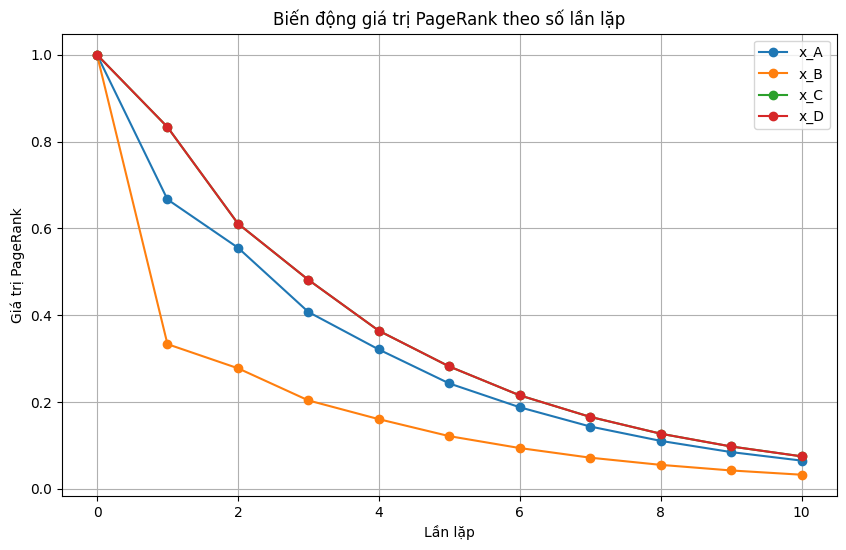

In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
A=np.array([
    [0.0,0.0,1/3,1/3],
    [0.0,0.0,1/3,0.0],
    [0.5,0.0,0.0,1/3],
    [0.5,0.0,1/3,0.0]
])
x=np.array([1.0, 1.0, 1.0, 1.0])
history=[x.copy()]
for i in range(10):
    x=np.dot(A,x)
    history.append(x.copy())
df=pd.DataFrame(history, columns=["x_A","x_B","x_C","x_D"])
df.index.name="Lần lặp"
print("Kết quả bảng PageRank sau 10 lần lặp:")
print(df.round(6))
plt.figure(figsize=(10, 6))
for col in df.columns:
    plt.plot(df.index, df[col],label=col,marker='o')
plt.title("Biến động giá trị PageRank theo số lần lặp")
plt.xlabel("Lần lặp")
plt.ylabel("Giá trị PageRank")
plt.legend()
plt.grid(True)
plt.show()

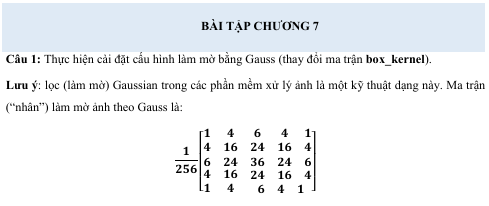

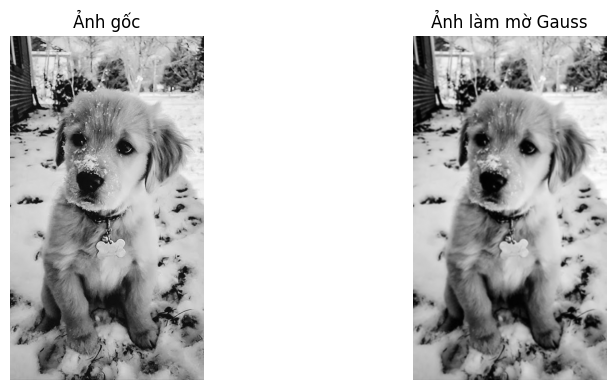

In [44]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# --- TẢI ẢNH (dạng grayscale) ---
img = cv2.imread('/content/anhbaitap3.jpg', cv2.IMREAD_GRAYSCALE)

# --- MA TRẬN GAUSSIAN KERNEL 5x5 (theo đề bài) ---
gauss_kernel = (1/256) * np.array([
    [1, 4, 6, 4, 1],
    [4,16,24,16, 4],
    [6,24,36,24, 6],
    [4,16,24,16, 4],
    [1, 4, 6, 4, 1]
])

# --- ÁP DỤNG FILTER 2D VỚI KERNEL GAUSS ---
blurred = cv2.filter2D(img, -1, gauss_kernel)

# --- HIỂN THỊ KẾT QUẢ ---
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.title('Ảnh gốc')
plt.imshow(img, cmap='gray')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('Ảnh làm mờ Gauss')
plt.imshow(blurred, cmap='gray')
plt.axis('off')

plt.tight_layout()
plt.show()


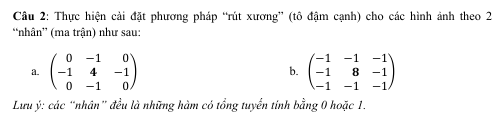

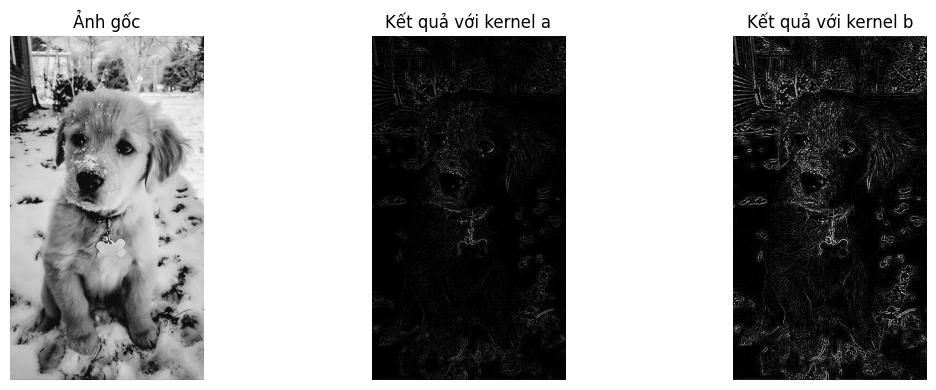

In [45]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
img=cv2.imread('/content/anhbaitap3.jpg',cv2.IMREAD_GRAYSCALE)
kernel_a=np.array([
    [ 0,-1,0],
    [-1,4,-1],
    [ 0,-1,0]])
kernel_b=np.array([
    [-1,-1,-1],
    [-1,8,-1],
    [-1,-1,-1]])
result_a=cv2.filter2D(img,-1,kernel_a)
result_b=cv2.filter2D(img,-1,kernel_b)
plt.figure(figsize=(12,4))
plt.subplot(1,3,1)
plt.title('Ảnh gốc')
plt.imshow(img,cmap='gray')
plt.axis('off')
plt.subplot(1,3,2)
plt.title('Kết quả với kernel a')
plt.imshow(result_a, cmap='gray')
plt.axis('off')
plt.subplot(1,3,3)
plt.title('Kết quả với kernel b')
plt.imshow(result_b, cmap='gray')
plt.axis('off')
plt.tight_layout()
plt.show()